In [1]:
# Let's keep our notebook clean, so it's a little more readable!
import warnings
warnings.filterwarnings('ignore')

In [2]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

%matplotlib notebook
%config InlineBackend.figure_format = 'retina'
# %matplotlib inline

# Linear Systems (2D)

<p align="center">
<img src="Imgs/linear_2D.png" alt="terms" width="300"/>
</p>

In [3]:
def Integrate2D(F,IC,dt=0.001,t_max=10,quiver=True,xlim=[-2,2],ylim=[-2,2],dquiver=0.1):
    """
    Returns the numerically integrated (euler method) solutions of 2D dX/dt = F(X) for all initial conditions in list IC.
    F must be a R^2-->R^2 vector field of the form dx,dy = F(x,y).
    """
    num_steps = int(t_max/dt)
    Traj = []
    for ic in IC:
        traj = np.ndarray([num_steps,2],dtype=float) #container for solution
        traj[0,0], traj[0,1] = ic[0], ic[1]
        for t in range(1,num_steps): #euler integration
            traj[t,:] = traj[t-1,:]+dt*np.array(F(traj[t-1,0],traj[t-1,1]))
        Traj.append(traj)
        
    # plot 
    fig = plt.figure(figsize=(10,5))
    
    # Plot trajectories in time
    ax = plt.subplot(121)
    for i,traj in enumerate(Traj):
        ax.plot(traj[:,0])
        ax.plot(traj[:,1]) 
    
    ax.set_xlabel('time steps')
    ax.set_ylabel('x')

    ax = plt.subplot(122)
    for i, traj in enumerate(Traj):
        plt.plot(traj[:,0],traj[:,1])
        plt.plot(traj[0,0],traj[0,1],'k.')
    
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')

    # Plot phase portratit
    if quiver:
        X1, X2 = np.meshgrid(np.arange(xlim[0],xlim[1],dquiver), np.arange(ylim[0],ylim[1],dquiver))
        dX1, dX2 = F(X1,X2)
        plt.quiver(X1, X2, dX1, dX2, units='width')
    plt.xlim(xlim)
    plt.ylim(ylim)

    
def vector_field_2D(A):
    def system2D(x1,x2):
        dx1 = A[0][0]*x1 + A[0][1]*x2
        dx2 = A[1][0]*x1 + A[1][1]*x2
        return dx1, dx2

    return lambda x1,x2: system2D(x1,x2)

# Stability Analysis

<p align="center">
<img src="Imgs/linear_stability_2D_.png" alt="terms" width="800"/>
</p>

Blue: asymptotically stable

Pink: unstable

Orange: Lyapunov stable (limit cycles)

Figure adapted from: https://upload.wikimedia.org/wikipedia/commons/3/3b/Stability_Diagram.png

## Saddle (unstable)

<IPython.core.display.Javascript object>


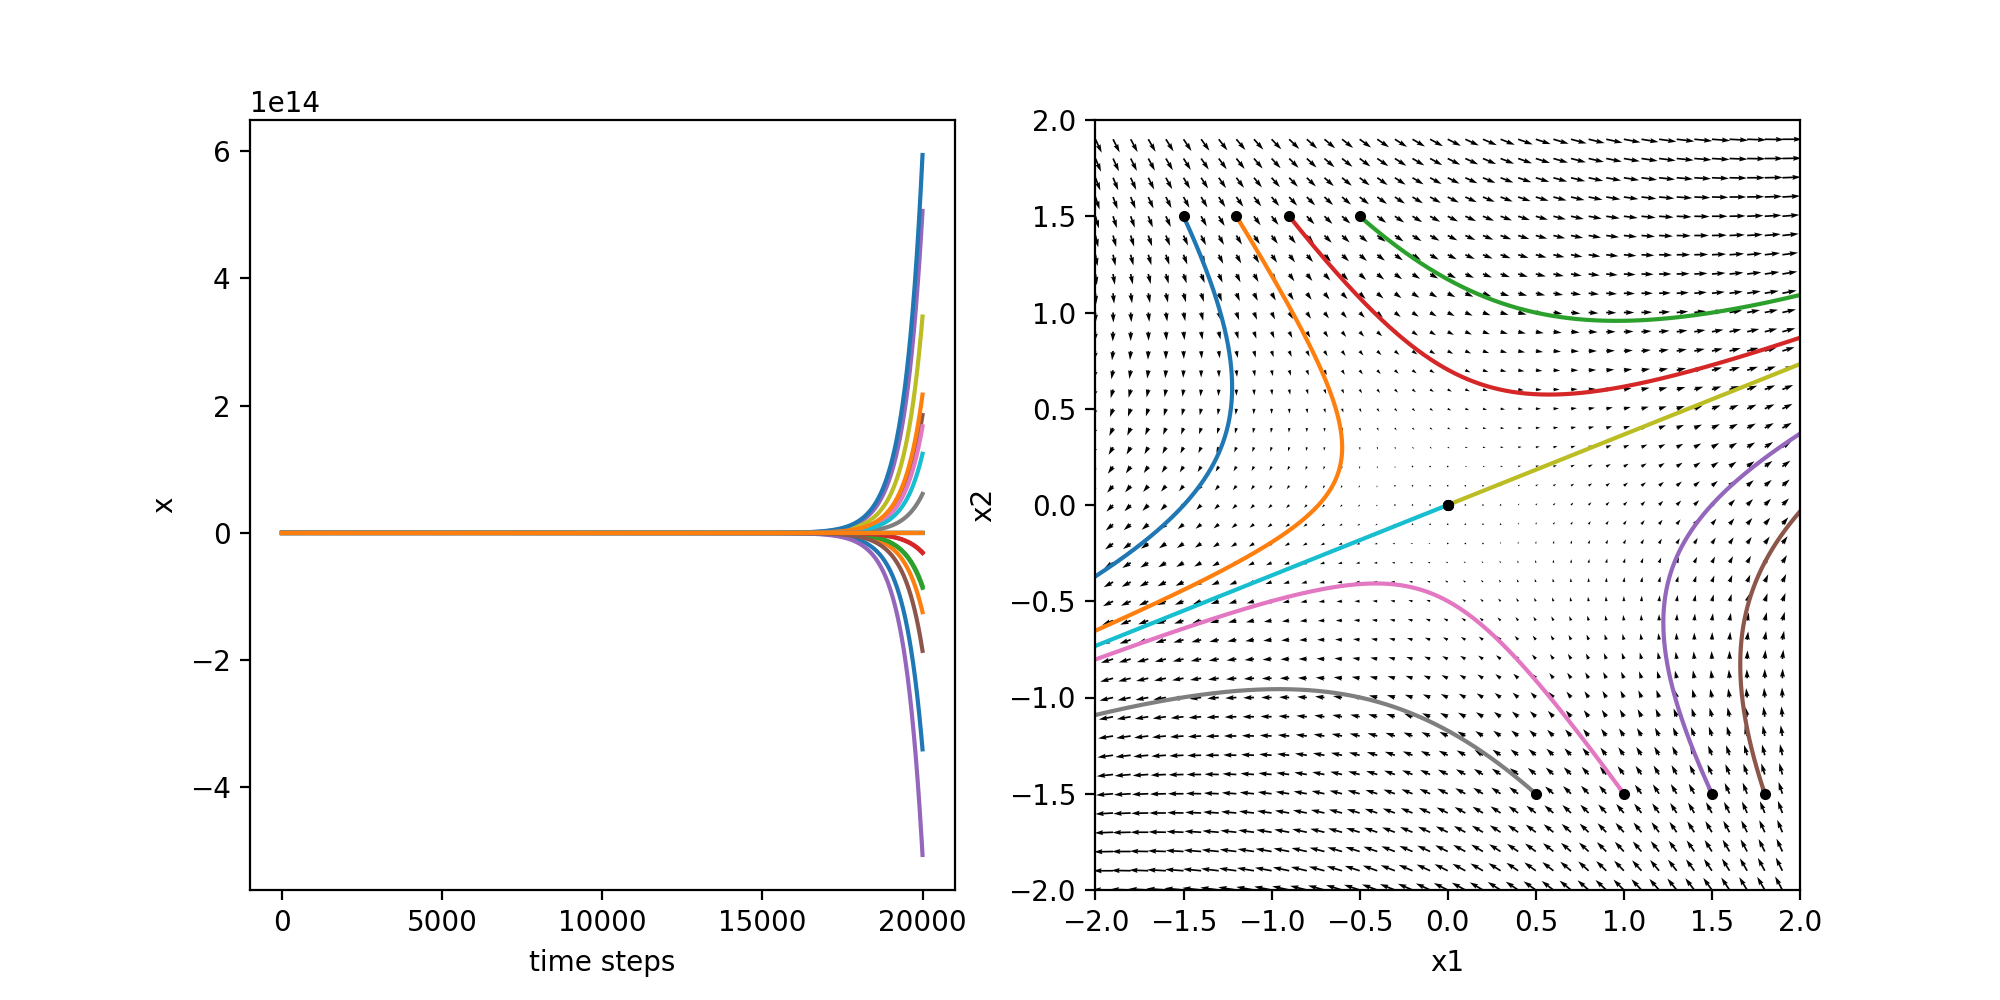

The eigenvalues of the system are: [ 1.73205081 -1.73205081]


In [4]:
A = np.array([[1,2],[1,-1]])
F = vector_field_2D(A)

# plot
IC = [[-1.5, 1.5], [-1.2, 1.5], [-0.5,1.5], [-0.9, 1.5], [1.5,-1.5], [1.8,-1.5], [1.0,-1.5], [0.5,-1.5], [0.0001,-0.0001], [-0.0001,0.0001], [0,0]]
Integrate2D(F,IC, t_max=20)

evals, _ = np.linalg.eig(A)
print(f'The eigenvalues of the system are: {evals}')

## Center (Lyapunov stable)

<IPython.core.display.Javascript object>


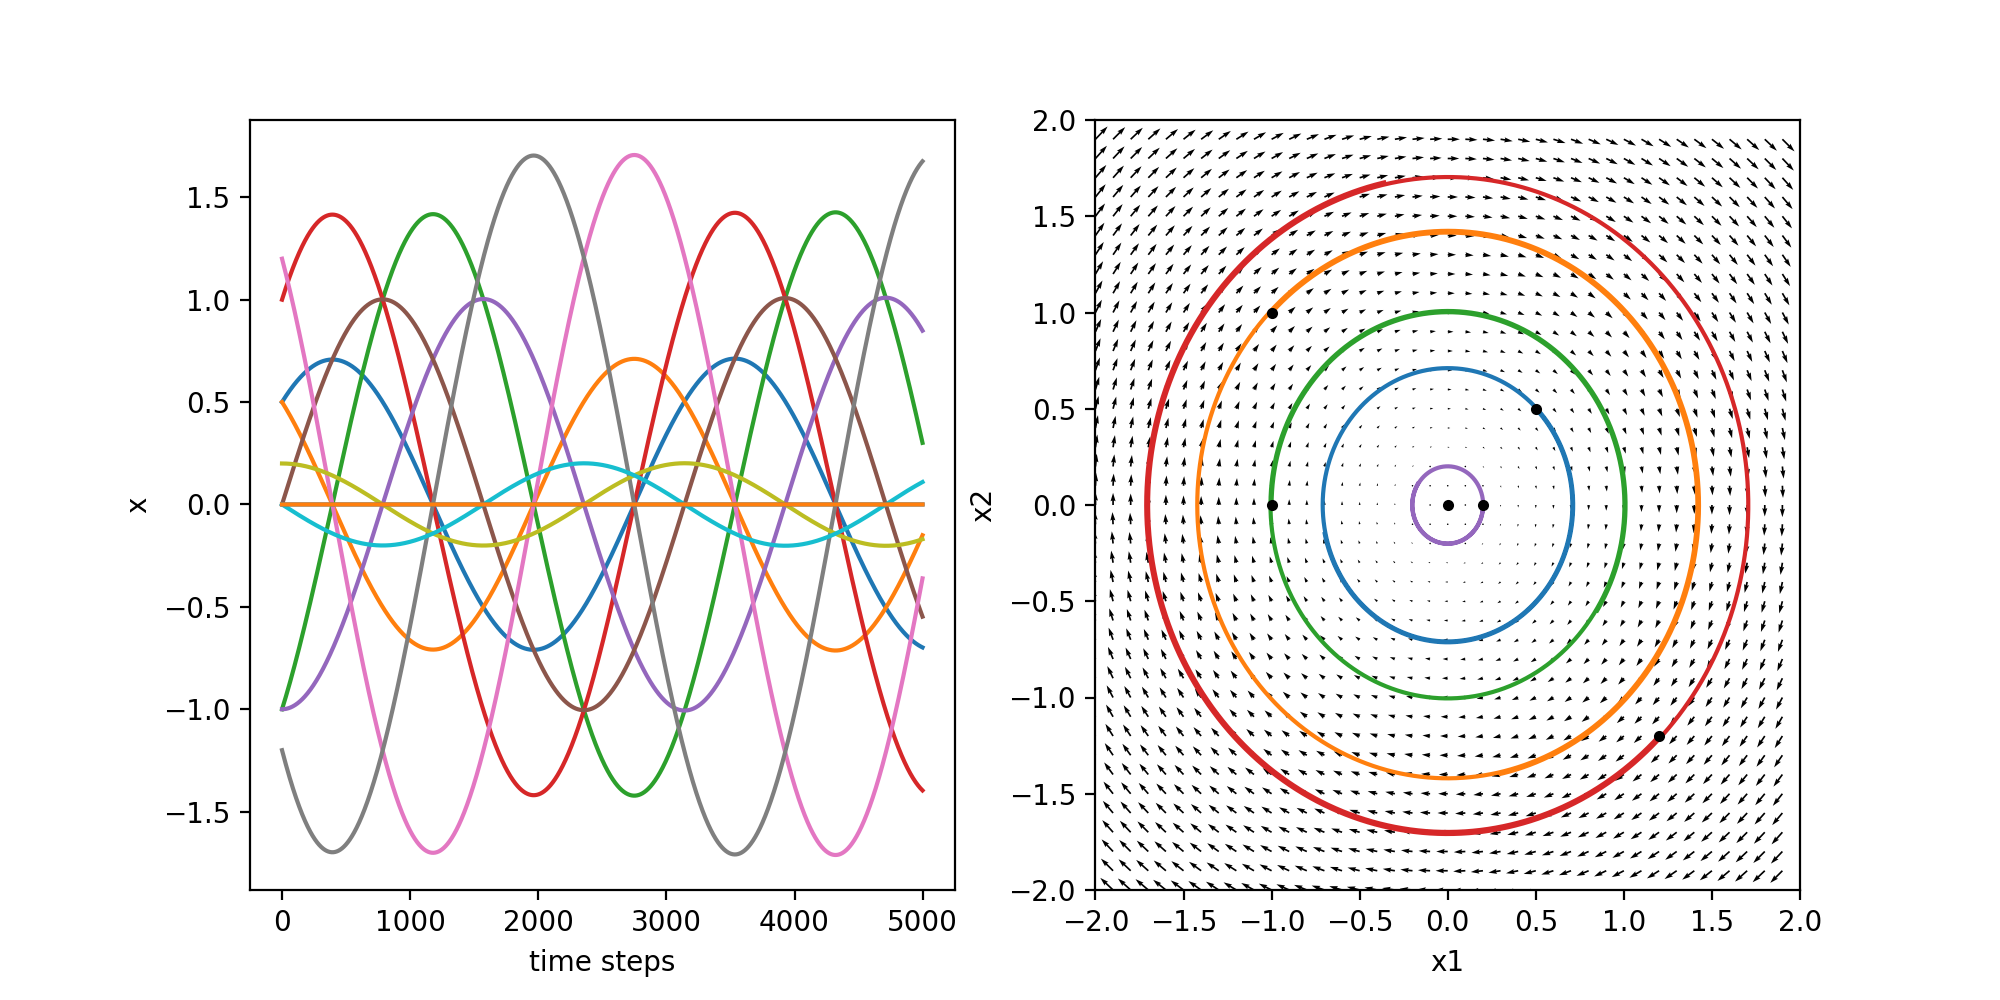

The eigenvalues of the system are: [0.+2.j 0.-2.j]


In [5]:
A = np.array([[0,2],[-2,0]])
F = vector_field_2D(A)

# plot
IC = [[0.5, 0.5], [-1,1], [-1,0], [1.2,-1.2], [0.2,0], [0., 0.]]
Integrate2D(F,IC, t_max=5)

evals, _ = np.linalg.eig(A)
print(f'The eigenvalues of the system are: {evals}')

## Degenerate Sink (stable)

<IPython.core.display.Javascript object>


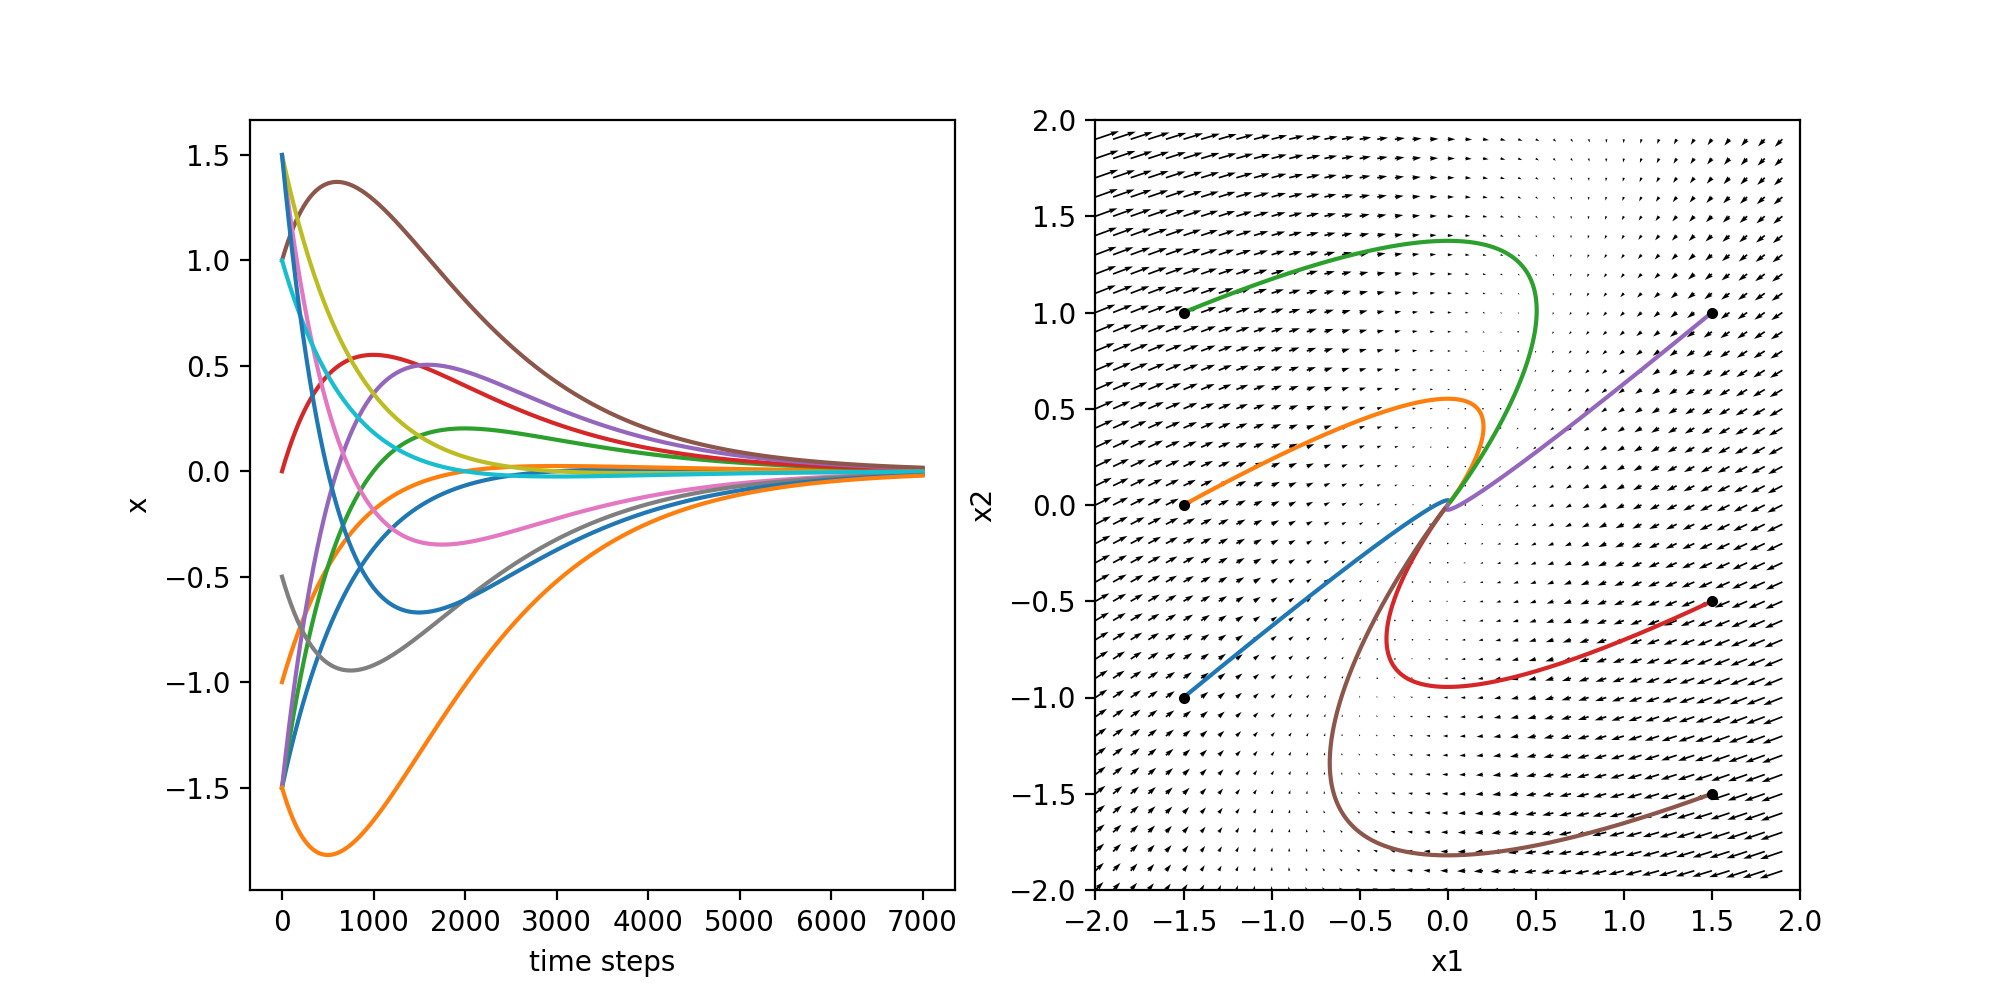

The eigenvalues of the system are: [-1. -1.]


In [6]:
A = np.array([[-2,1],[-1,0]])
F = vector_field_2D(A)

# plot
IC = [[-1.5,-1.0], [-1.5,0.0], [-1.5,1.0], [1.5,-0.5], [1.5, 1.0], [1.5,-1.5]]
Integrate2D(F,IC, t_max=7)

evals, _ = np.linalg.eig(A)
print(f'The eigenvalues of the system are: {evals}')

## Spiral Sink (stable)

<IPython.core.display.Javascript object>


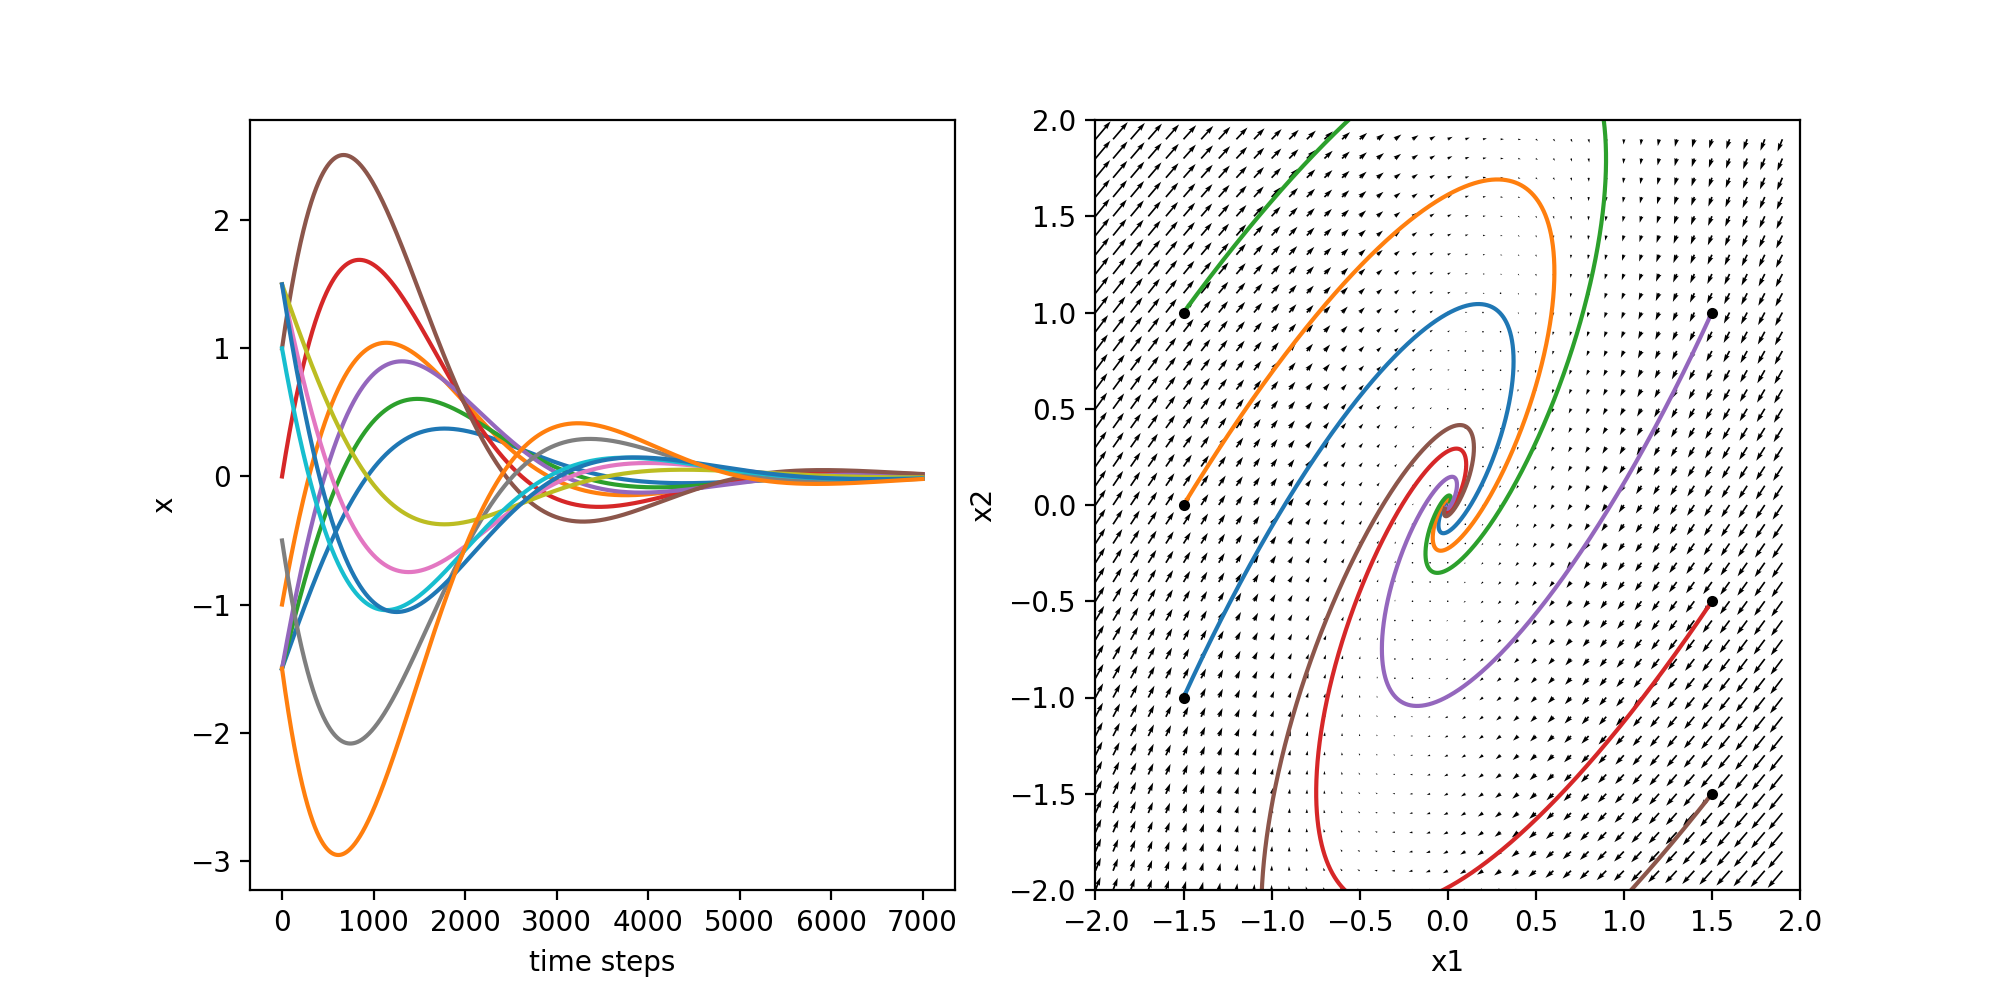

The eigenvalues of the system are: [-0.75+1.19895788j -0.75-1.19895788j]


In [7]:
A = np.array([[-2,1],[-3,0.5]])
F = vector_field_2D(A)

# plot
IC = [[-1.5,-1.0], [-1.5,0.0], [-1.5,1.0], [1.5,-0.5], [1.5, 1.0], [1.5,-1.5]]
Integrate2D(F,IC, t_max=7)

evals, _ = np.linalg.eig(A)
print(f'The eigenvalues of the system are: {evals}')

## Spiral Source (unstable)

<IPython.core.display.Javascript object>


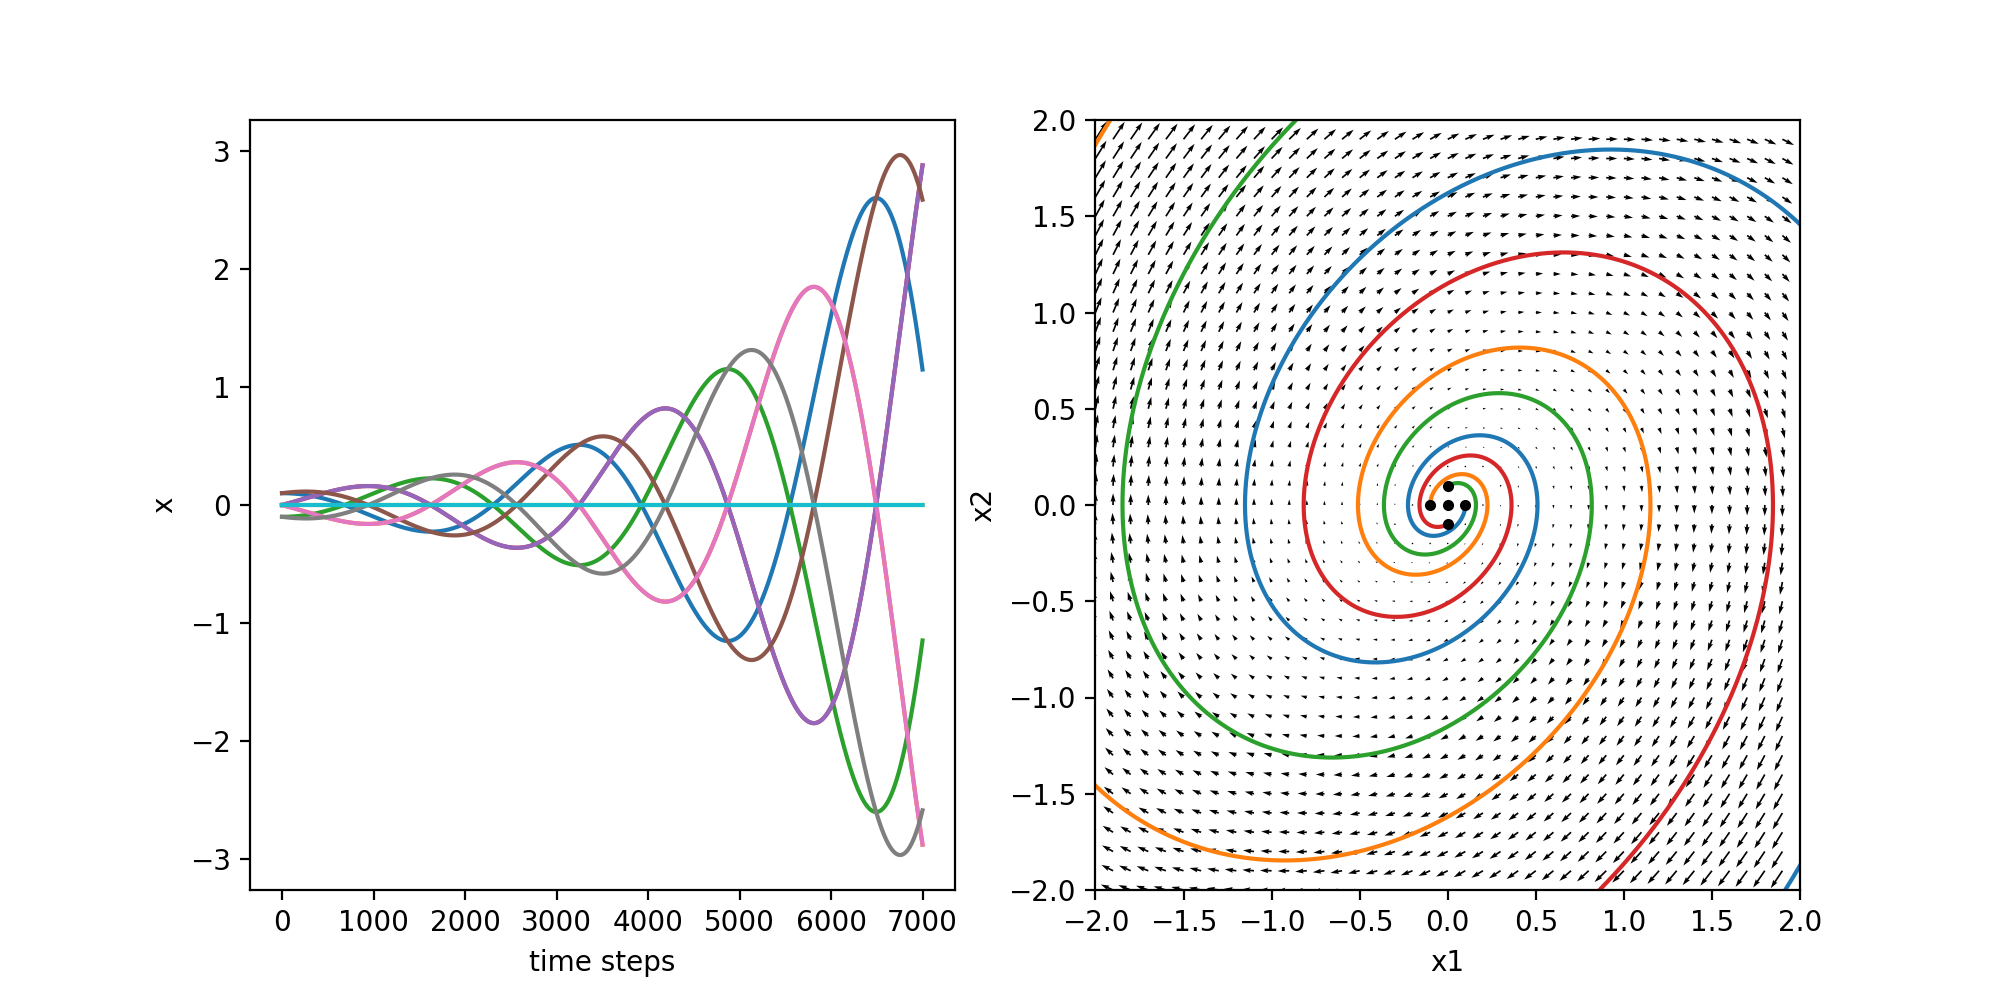

The eigenvalues of the system are: [0.5+1.93649167j 0.5-1.93649167j]


In [8]:
A = np.array([[0,2],[-2,1]])
F = vector_field_2D(A)

# plot
IC = [[0.1, 0], [-0.1, 0], [0,0.1], [0, -0.1], [0,0]]
Integrate2D(F,IC, t_max=7)

evals, _ = np.linalg.eig(A)
print(f'The eigenvalues of the system are: {evals}')

## Line of (stable) fixed points

In [ ]:
A = np.array([[-2,-1],[-2,-1]])
F = vector_field_2D(A)

# plot
IC = [[2, 0], [-2, 0], [0,2], [0, -2], [1,1], [-1,-1], [0,0], [-0.5,0.5], [0.5,-0.5], [-0.5, -0.2]]
Integrate2D(F,IC, t_max=10)

evals, _ = np.linalg.eig(A)
print(f'The eigenvalues of the system are: {evals}')